### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


### Load and Prepare Dataset

In [11]:
# Load dataset
df = pd.read_csv(r"C:\Users\prapt\Downloads\archive (7)\twitter_training.csv", header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [13]:
df.shape

(74682, 4)

In [15]:
df.isnull().sum().sum()

686

In [17]:
# Drop missing values
df.dropna(inplace=True)

# Keep only relevant sentiments
valid_sentiments = ['Positive', 'Negative', 'Neutral']
df = df[df['Sentiment'].isin(valid_sentiments)].copy()


In [19]:
df.isnull().sum().sum()

0

### Clean Tweet Text

In [22]:
def clean_tweet(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = re.sub(r'@\w+|\#', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ""

df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)


### Visualize Overall Sentiment Distribution

C:\Users\prapt\AppData\Local\Temp\ipykernel_8956\2367525334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


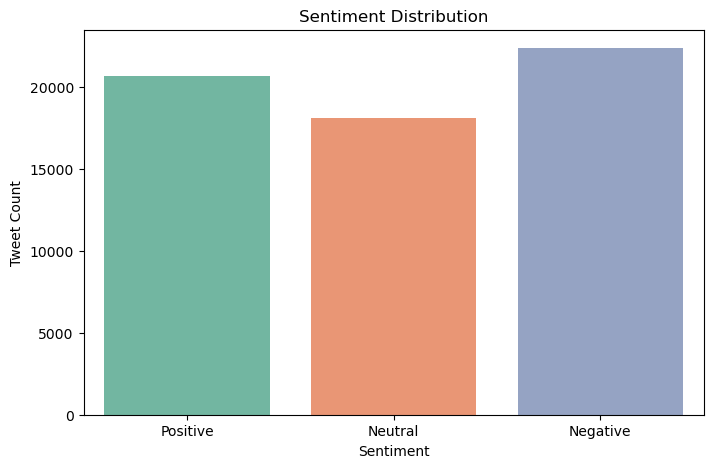

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


### WordCloud for Each Sentiment

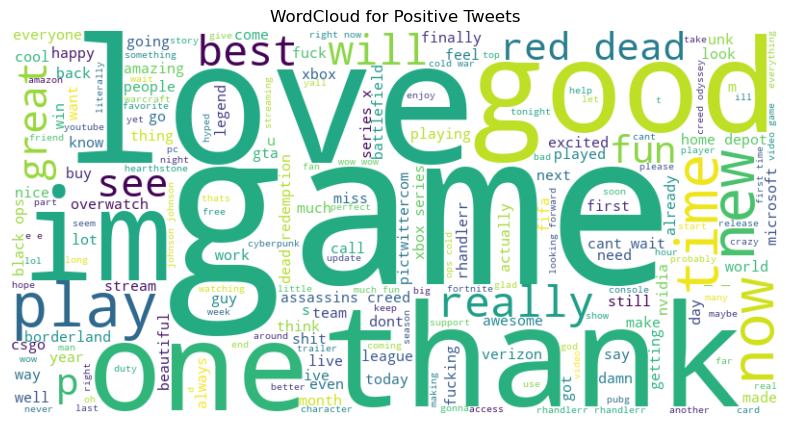

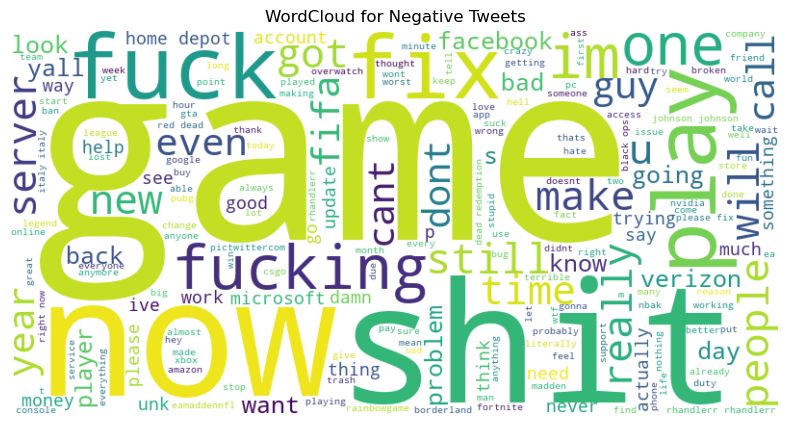

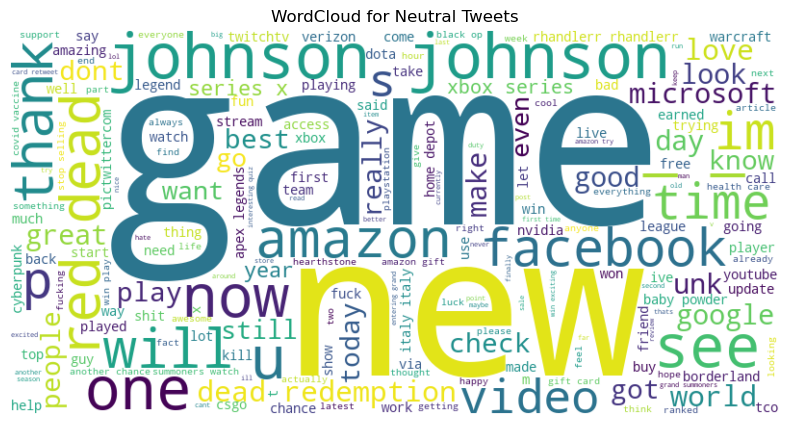

In [28]:
for sentiment in valid_sentiments:
    text = " ".join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()


### Sentiment Distribution for Top 5 Entities

C:\Users\prapt\AppData\Local\Temp\ipykernel_8956\3869712314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


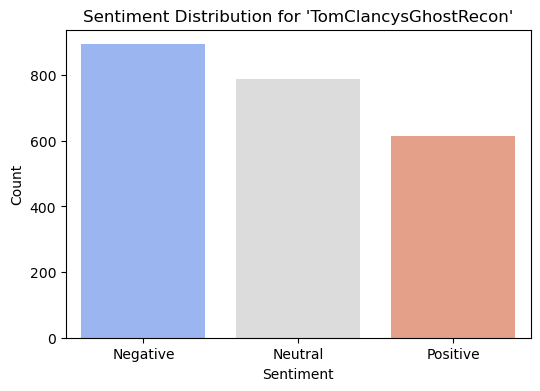

C:\Users\prapt\AppData\Local\Temp\ipykernel_8956\3869712314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


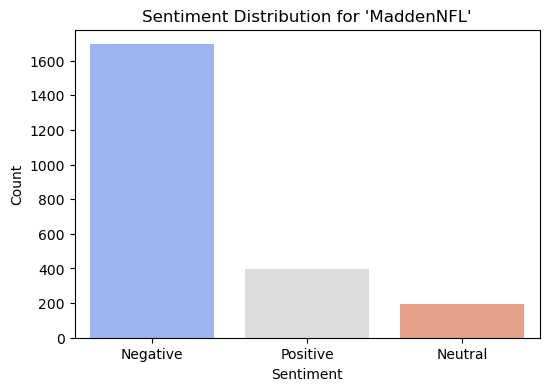

C:\Users\prapt\AppData\Local\Temp\ipykernel_8956\3869712314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


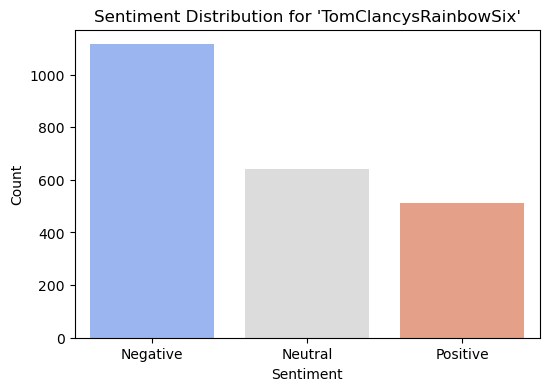

C:\Users\prapt\AppData\Local\Temp\ipykernel_8956\3869712314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


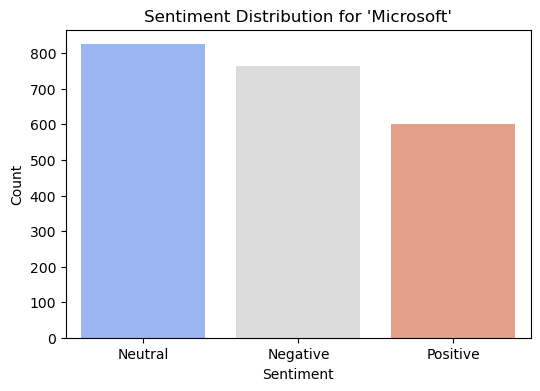

C:\Users\prapt\AppData\Local\Temp\ipykernel_8956\3869712314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


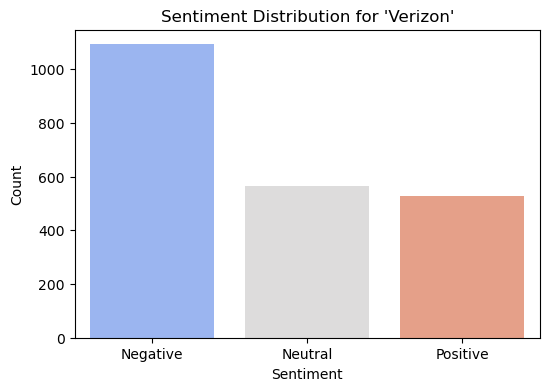

In [31]:
top_entities = df['Entity'].value_counts().head(5).index

for entity in top_entities:
    subset = df[df['Entity'] == entity]
    sentiment_counts = subset['Sentiment'].value_counts()

    plt.figure(figsize=(6,4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
    plt.title(f"Sentiment Distribution for '{entity}'")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()


### Train-Test Split & TF-IDF Vectorization

In [34]:
X = df['Clean_Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


### Train Logistic Regression Model

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

### Evaluate Model

Classification Report:

              precision    recall  f1-score   support

    Negative       0.78      0.81      0.79      4427
     Neutral       0.73      0.68      0.70      3678
    Positive       0.76      0.76      0.76      4120

    accuracy                           0.76     12225
   macro avg       0.75      0.75      0.75     12225
weighted avg       0.76      0.76      0.76     12225



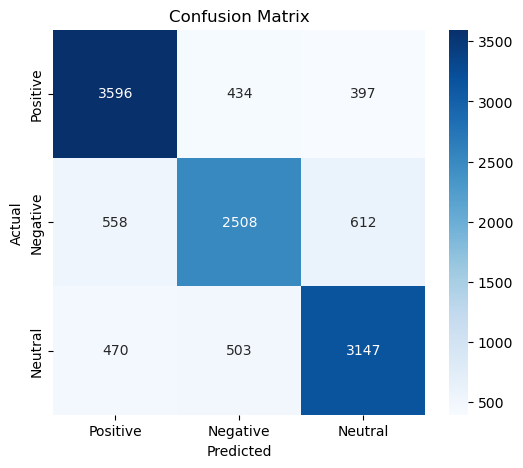

In [40]:
y_pred = model.predict(X_test_tfidf)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=valid_sentiments, yticklabels=valid_sentiments, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
